# Looking at very large arrays

In [1]:
import numpy as np
import fastplotlib as fpl

To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

WGPU: enumerate_adapters() is deprecated, use enumerate_adapters_sync() instead.
Unable to find extension: VK_EXT_swapchain_colorspace
WGPU: request_adapter() is deprecated, use request_adapter_sync() instead.


Available devices:
✅ (default) | AMD RADV POLARIS10 (ACO) | DiscreteGPU | Vulkan | Mesa 20.3.5 (ACO)
❗ | llvmpipe (LLVM 11.0.1, 256 bits) | CPU | Vulkan | Mesa 20.3.5 (LLVM 11.0.1)
✅ | NVIDIA GeForce RTX 3080 | DiscreteGPU | Vulkan | 530.30.02
❗ | Radeon RX 570 Series (POLARIS10, DRM 3.40.0, 5.10.0-21-amd64, LLVM 11.0.1) | Unknown | OpenGL | 4.6 (Core Profile) Mesa 20.3.5


## Generate some sine and cosine data

In [2]:
xs = np.linspace(0, 1_000, 20_000)

sine = np.sin(np.sqrt(xs))

data = np.vstack([sine * i for i in range(10_000)])

In [3]:
data.shape

(10000, 20000)

RFBOutputContext()

WGPU: request_device() is deprecated, use request_device_sync() instead.


JupyterWgpuCanvas()
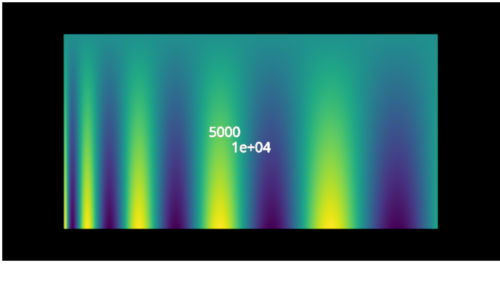

In [4]:
fig = fpl.Figure()

fig[0, 0].add_image(data, cmap="viridis")

fig.show(maintain_aspect=False)